In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import os

In [90]:
path3 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [91]:
path4 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU4RHO5/SCAMBIABILE/'

In [92]:
path5 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU5RHO5'

In [93]:
path6 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU6RHO5'

In [94]:
path7 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU7RHO5'

In [13]:
def delays(novelties,flag):
    delay = np.diff(novelties)
    delay = np.array([i for i in delay if i!=1])
    delay = np.array([i-1 for i in delay])
    if(flag == True):
        return np.log(delay)
    else:
        return delay

In [57]:
def transform_array(original_array,max_val):
    # Extract the two rows from the original array
    values = original_array[0]
    frequencies = original_array[1]

    # Create a new array with all integer values in the specified range
    new_values = list(range(1, max_val + 1))

    # Initialize the new frequencies array with zeros
    new_frequencies = [0] * len(new_values)

    # Update the frequencies based on the original array
    for i, value in enumerate(values):
        index = new_values.index(value)
        new_frequencies[index] = frequencies[i]

    # Create the final transformed array
    transformed_array = new_frequencies

    return np.array(transformed_array)


In [95]:
paths = [path3,path4,path5,path6,path7]

In [96]:
paths[0]

'/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [105]:
path01= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA01NU5RHO2/NOVITA'

In [106]:
path02= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA02NU4RHO2/NOVITA'

In [107]:
path03= '/home/leggero_e_tranquillo/Scrivania/articolo/ETA02NU5RHO3/NOVITA'

In [108]:
paths_umst = [path01,path02,path03]

In [9]:
path2 = '/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA'

In [97]:
delays_frequencies_of_each_path = []
for path in paths:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0] 
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path.append([np.arange(1,max_del+1),avg_freqs])

In [109]:
delays_frequencies_of_each_path_umst = []
for path in paths_umst:
    all_files = glob.glob(os.path.join(path, '*.txt'))
    all_incr_delays = []
    for novelties in all_files[:]:
        novs = np.loadtxt(novelties)
        list_of_delays = delays(novs,False)
        support = np.unique(list_of_delays,return_counts=True)
        increasing_delays = support[0] 
        freqs = support[1]/np.sum(support[1])
        all_incr_delays.append([increasing_delays,freqs])
    
    max_del = 0
    for i in all_incr_delays:
        max_support = np.max(i[0])
        if(max_support>max_del):
            max_del = max_support
    transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]
    avg_freqs = np.zeros(int(max_del))
    for i in transformed_delay:
        avg_freqs +=i
    avg_freqs= avg_freqs/len(transformed_delay)
    delays_frequencies_of_each_path_umst.append([np.arange(1,max_del+1),avg_freqs])

In [110]:
delays_frequencies_of_each_path_umst

[[array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 5.7104e+04, 5.7105e+04,
         5.7106e+04]),
  array([2.79065988e-01, 1.44731474e-01, 7.75350709e-02, ...,
         0.00000000e+00, 0.00000000e+00, 9.10000910e-05])],
 [array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.3316e+04, 1.3317e+04,
         1.3318e+04]),
  array([2.54083428e-01, 1.57818997e-01, 9.91780874e-02, ...,
         0.00000000e+00, 0.00000000e+00, 3.47222222e-05])],
 [array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 3.3638e+04, 3.3639e+04,
         3.3640e+04]),
  array([9.79459822e-02, 6.92054838e-02, 5.15783194e-02, ...,
         0.00000000e+00, 0.00000000e+00, 9.61538462e-05])]]

In [100]:
len(delays_frequencies_of_each_path[1][0]),len(delays_frequencies_of_each_path[1][1])

(3207, 3207)

In [10]:
all_files = glob.glob(os.path.join(path2, '*.txt'))

In [12]:
all_files[0]

'/home/leggero_e_tranquillo/Scrivania/articolo/NU3RHO5/SCAMBIABILE/NOVITA/nov_nu3rho5seed1701283569_1N_04_exchange.txt'

In [38]:
all_incr_delays = []
for novelties in all_files[:]:
    novs = np.loadtxt(novelties)
    list_of_delays = delays(novs,False)
    support = np.unique(list_of_delays,return_counts=True)
    increasing_delays = support[0] 
    freqs = support[1]/np.sum(support[1])
    all_incr_delays.append([increasing_delays,freqs])

In [47]:
all_incr_delays[1]

[array([1.000e+00, 2.000e+00, 3.000e+00, ..., 5.679e+03, 5.719e+03,
        5.836e+03]),
 array([3.15789474e-03, 2.60651629e-03, 3.60902256e-03, ...,
        5.01253133e-05, 5.01253133e-05, 5.01253133e-05])]

In [58]:
original_array = [[1, 4, 6, 9], [4, 5, 32, 78]]
transformed_array = transform_array(original_array,50)

In [59]:
transformed_array

array([ 4,  0,  0,  5,  0, 32,  0,  0, 78,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [60]:
max_del = 0
for i in all_incr_delays:
    max_support = np.max(i[0])
    if(max_support>max_del):
        max_del = max_support

In [61]:
max_del

29678.0

In [62]:
transformed_delay = [transform_array(i,int(max_del)) for i in all_incr_delays]

In [70]:
transformed_delay

[array([0.00314656, 0.00278349, 0.00290451, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00315789, 0.00260652, 0.00360902, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00604806, 0.00623622, 0.00607494, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00092826, 0.00106087, 0.00079565, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00697884, 0.00661282, 0.00712525, ..., 0.        , 0.        ,
        0.        ]),
 array([0.01077398, 0.01067206, 0.01040999, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00059233, 0.00133274, 0.00133274, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00825228, 0.00839965, 0.00751547, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00278862, 0.00290017, 0.00262131, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00236714, 0.00349154, 0.00272222, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00360284, 0.00355605, 0.00364964, ..., 0

In [73]:
avg_freqs = np.zeros(int(max_del))
avg_freqs

array([0., 0., 0., ..., 0., 0., 0.])

In [74]:
avg_freqs = np.zeros(int(max_del))
for i in transformed_delay:
    avg_freqs +=i
avg_freqs= avg_freqs/len(transformed_delay)

In [77]:
np.sum(avg_freqs)

1.0

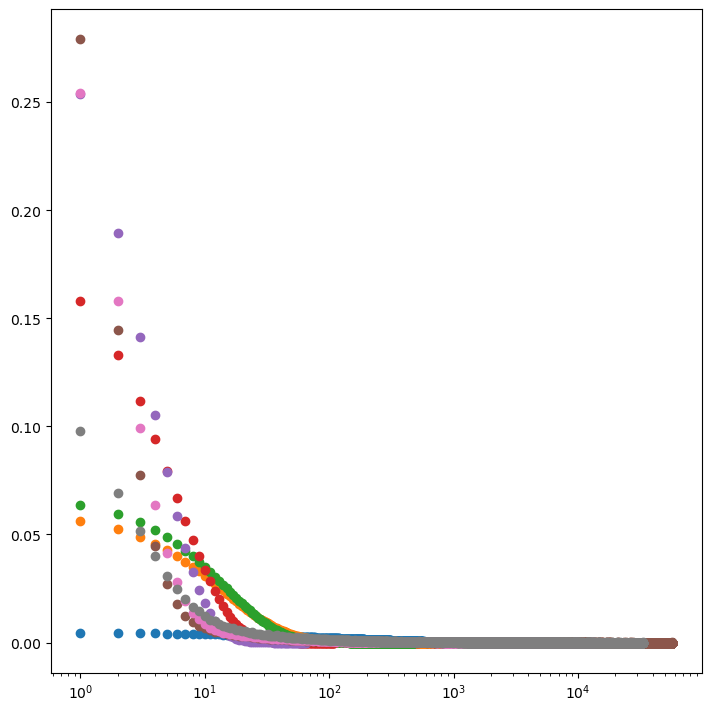

In [112]:
fig, axs = plt.subplots(figsize=(7,7),constrained_layout=True)
axs.scatter(delays_frequencies_of_each_path[0][0],delays_frequencies_of_each_path[0][1])
axs.scatter(delays_frequencies_of_each_path[1][0],delays_frequencies_of_each_path[1][1])
axs.scatter(delays_frequencies_of_each_path[2][0],delays_frequencies_of_each_path[2][1])
axs.scatter(delays_frequencies_of_each_path[3][0],delays_frequencies_of_each_path[3][1])
axs.scatter(delays_frequencies_of_each_path[4][0],delays_frequencies_of_each_path[4][1])
axs.scatter(delays_frequencies_of_each_path_umst[0][0],delays_frequencies_of_each_path_umst[0][1])
axs.scatter(delays_frequencies_of_each_path_umst[1][0],delays_frequencies_of_each_path_umst[1][1])
axs.scatter(delays_frequencies_of_each_path_umst[2][0],delays_frequencies_of_each_path_umst[2][1])
axs.set_xscale('log')
#axs.set_yscale('log')
plt.show()